# **Pertemuan #11 - Data Cleansing**

Data Wrangling - Sekolah Data - Pacmann Academy

Data yang diperoleh dalam bentuk mentahan (raw), belum dapat di analisa / modelkan secara langsung karena memiliki beberapa permasalahan.

1. Terdapat missing value \
   Missing value menandakan ketiadaan nilai. Hal ini berbeda dengan angka 0 atau string kosong (""). Missing value dapat disebabkan oleh beberapa hal:
      - Kesalahan pengumpulan data
      - Corrupt / error pada database
      - Kesengajaan penghilangan data

<img src="https://drive.google.com/uc?export=view&id=1GkOf6jiUQJOpNR2R5fd0yEFER4dSLW0R" alt="Drawing" width= 500px;/>

 2. Terdapat Outlier \
 Outlier merupakan nilai yang menyimpang dari rata-rata kebanyakan data.

<img src="https://drive.google.com/uc?export=view&id=1aAyaBbnQ2Ywjcia-_NBW4k4lnkIWWSKO" alt="Drawing" width= 500px;/>

 3. Terdapat data duplikat
 Data duplikat terjadi karena adanya entry/record data yang sama

<img src="https://drive.google.com/uc?export=view&id=1a6bAp_nOncXpgZdrHH0tHg-n_l4dyI9g" alt="Drawing" width= 500px;/>

 4. Terdapat Inkonsistensi pada data \
  Inkonsistensi direpresentasikan dengan data yang memiliki meaning yang sama namun ditulis secara berbeda.

<img src="https://drive.google.com/uc?export=view&id=1q9EqPtG2yGRiPtFIMzVTOvS2QJNtLLa7" alt="Drawing" width= 500px;/>

Permasalahan diatas, perlu di tangani terlebih dahulu sebelum masuk ke tahapan analisa / pemodelan data karena dapat berpengaruh ke hasil analisa dan interpretasi model. Pada materi kali ini, akan dipelajari cara menangani masalah pada data yang telah dijabarkan diatas

**Outline**

- Handling NaN
- Handling Outlier
- Handling Duplicate
- Handling Inkonsistent Format

## **Topik**
---



### **Subtopik 1 : Handling Missing Value**`

Rudi bekerja sebagai analis di sebuah agen properti. Dia diminta untuk menganalisis data properti yang dimiliki oleh perusahaan. Namun sebelum melakukan analisis, dia diminta untuk membersihkan datanya terlebih dahulu agar hasil analisis bisa akurat.

In [ ]:
# import library pandas
import pandas as pd

In [ ]:
# read data property
property_data = pd.read_csv('property_data.csv')

# menampilkan semua data property
property_data

,lai,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104,PUTNAM,Y,3.0,1.0,900.0
1,100002000,197,LXT,N,1.0,1.0,NaN
2,100003000,199,LEXINGTON,N,NaN,1.0,850.0
3,100004000,201,berkeley,Y,1.0,NaN,700.0
4,100004000,201,berkeley,Y,1.0,NaN,700.0
5,100005000,203,BERKELEY,Y,3.0,2.0,975.0
6,100006000,207,Berkeley,Y,NaN,1.0,800.0
7,100007000,209,WASHINGTON,NaN,2.0,1.0,950.0
8,100008000,213,TREMONT,Y,1.0,1.0,NaN
9,100009000,215,TREMONT,Y,NaN,2.0,88000.0


Terlihat pada beberapa kolom berisi terdapat missing value (NaN). Sebelum menangani missing value, akan dilakukan pengecekan terlebih dahulu, untuk melihat persentase missing value di tiap kolom


### Identified Missing Value

Untuk mengecek missing value dapat dilakukan dengan method menggunakan `isna()` atau `isnull()`

In [ ]:
property_data.isna().head()

,lai,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,True,False,False
3,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False


In [ ]:
property_data.isnull().head()

,lai,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,True,False,False
3,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False


hasil fungsi `isna()` berupa nilai boolean yang merepresentasikan data yang memiliki nilai (False) dan missing value (True).

Hasil ini dapat di ringkas/agregasi menggunakan fungsi aggregasi `.sum()` untuk menghitung jumlah missing value di tiap kolom.

In [ ]:
# Menghitung jumlah missing value pada tiap kolom
property_data.isna().sum()

lai             0
ST_NUM          0
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    3
NUM_BATH        2
SQ_FT           2
dtype: int64

hasil ringkasan juga dapat direpresentasikan dalam bentuk persentase

In [ ]:
property_data.isna().sum() / len(property_data)*100

lai              0.000000
ST_NUM           0.000000
ST_NAME          0.000000
OWN_OCCUPIED    18.181818
NUM_BEDROOMS    27.272727
NUM_BATH        18.181818
SQ_FT           18.181818
dtype: float64

### Handle missing value

Untuk menangani missing value, dapat dilakukan dengan beberapa cara:
1. Imputasi missing value
2. Drop kolom yang mengandung missing value

1. Imputasi missing value \
Menginput nilai pada missing value bergantung pada jenis data dari kolom yang mengandung NaN.
     
     - Jika numeric dapat diinput dengan nilai mean, median atau modus.
     - Jika kategorik dapat diinput dengan nilai modus, nilai tetangga terdekat atau diganti dengan nilai "Unknown"

  Menginput missing value, dilakukan dengan menggunakan fungsi `.fillna`

In [ ]:
# menampilkan data property
property_data.head()

,lai,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104,PUTNAM,Y,3.0,1.0,900.0
1,100002000,197,LXT,N,1.0,1.0,NaN
2,100003000,199,LEXINGTON,N,NaN,1.0,850.0
3,100004000,201,berkeley,Y,1.0,NaN,700.0
4,100004000,201,berkeley,Y,1.0,NaN,700.0


In [ ]:
# mengecek tipe data tiap kolom
property_data.dtypes

lai               int64
ST_NUM            int64
ST_NAME          object
OWN_OCCUPIED     object
NUM_BEDROOMS    float64
NUM_BATH        float64
SQ_FT           float64
dtype: object

- Kolom `ST_NAME` dan `OWN_OCCUPIED` merupakan variable categorical
- Kolom `NUM_BEDROOMS` dan 	`NUM_BATH` merupakan variable numerical discrite
- dan kolom	`SQ_FT` merupakan kolom numerical continues

Dari hasil pengecekan sebelumnya kita akan menginput kolom `SQ_FT` dengan nilai median. Hal ini dilakukan karena pada kolom tersebut kemungkinan terdapat outlier.

In [ ]:
# meghitung nilai mean pada kolom SQ_FT
med_SEQ = property_data['SQ_FT'].median()
med_SEQ


900.0

In [ ]:
property_data['SQ_FT'] = property_data['SQ_FT'].fillna(med_SEQ)
property_data

,lai,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104,PUTNAM,Y,3.0,1.0,900.0
1,100002000,197,LXT,N,1.0,1.0,900.0
2,100003000,199,LEXINGTON,N,NaN,1.0,850.0
3,100004000,201,berkeley,Y,1.0,NaN,700.0
4,100004000,201,berkeley,Y,1.0,NaN,700.0
5,100005000,203,BERKELEY,Y,3.0,2.0,975.0
6,100006000,207,Berkeley,Y,NaN,1.0,800.0
7,100007000,209,WASHINGTON,NaN,2.0,1.0,950.0
8,100008000,213,TREMONT,Y,1.0,1.0,900.0
9,100009000,215,TREMONT,Y,NaN,2.0,88000.0


In [ ]:
property_data.isna().sum()

lai             0
ST_NUM          0
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    3
NUM_BATH        2
SQ_FT           0
dtype: int64

In [ ]:
property_data.dtypes

lai               int64
ST_NUM            int64
ST_NAME          object
OWN_OCCUPIED     object
NUM_BEDROOMS    float64
NUM_BATH        float64
SQ_FT           float64
dtype: object

Untuk kolom `OWN_OCCUPIED, NUM_BEDROOMS dan NUM_BATH`, karena datanya numerical discrite dan kategori akan diganti dengan nilai modus.

In [ ]:
# Mencari nilai modus dari kolom OWN_OCCUPIED, NUM_BEDROOMS dan NUM_BATH

mode_OWN_OCCUPIED = property_data['OWN_OCCUPIED'].mode()[0]
mode_NUM_BEDROOMS = property_data['NUM_BEDROOMS'].mode()[0]
mode_NUM_BATH = property_data['NUM_BATH'].mode()[0]

In [ ]:
property_data.isnull().sum()

lai             0
ST_NUM          0
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    3
NUM_BATH        2
SQ_FT           0
dtype: int64

In [ ]:
property_data['OWN_OCCUPIED'] = property_data['OWN_OCCUPIED'].fillna(mode_OWN_OCCUPIED)
property_data['NUM_BEDROOMS'] = property_data['NUM_BEDROOMS'].fillna(mode_NUM_BEDROOMS)
property_data['NUM_BATH'] = property_data['NUM_BATH'].fillna(mode_NUM_BATH)
property_data

,lai,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104,PUTNAM,Y,3.0,1.0,900.0
1,100002000,197,LXT,N,1.0,1.0,900.0
2,100003000,199,LEXINGTON,N,1.0,1.0,850.0
3,100004000,201,berkeley,Y,1.0,1.0,700.0
4,100004000,201,berkeley,Y,1.0,1.0,700.0
5,100005000,203,BERKELEY,Y,3.0,2.0,975.0
6,100006000,207,Berkeley,Y,1.0,1.0,800.0
7,100007000,209,WASHINGTON,Y,2.0,1.0,950.0
8,100008000,213,TREMONT,Y,1.0,1.0,900.0
9,100009000,215,TREMONT,Y,1.0,2.0,88000.0


In [ ]:
property_data.isna().sum()

lai             0
ST_NUM          0
ST_NAME         0
OWN_OCCUPIED    0
NUM_BEDROOMS    0
NUM_BATH        0
SQ_FT           0
dtype: int64

### **Subtopik 2 : Handling Outlier**

Selain menangani missing value, Rudi juga diminta untuk melakukan pengecekan outlier pada kolom data yang bertipe numerik

In [29]:
# import library pandas
import pandas as pd

# read data property
property_data = pd.read_csv('property_without_nan.csv')

# menampilkan semua data property
property_data

,lai,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104,PUTNAM,Y,3.0,1.0,900.0
1,100002000,197,LXT,N,1.0,1.0,900.0
2,100003000,199,LEXINGTON,N,1.0,1.0,850.0
3,100004000,201,berkeley,Y,1.0,1.0,700.0
4,100004000,201,berkeley,Y,1.0,1.0,700.0
5,100005000,203,BERKELEY,Y,3.0,2.0,975.0
6,100006000,207,Berkeley,Y,1.0,1.0,800.0
7,100007000,209,WASHINGTON,Y,2.0,1.0,950.0
8,100008000,213,TREMONT,Y,1.0,1.0,900.0
9,100009000,215,TREMONT,Y,1.0,2.0,88000.0


In [3]:
# menampilkan statistik deskriptif dari data
property_data.describe()

,lai,ST_NUM,NUM_BEDROOMS,NUM_BATH,SQ_FT
count,1.100000e+01,11.000000,11.000000,11.000000,11.000000
mean,1.000051e+08,196.181818,1.545455,1.181818,8784.090909
std,2.547726e+03,31.115328,0.820200,0.404520,26273.114282
min,1.000010e+08,104.000000,1.000000,1.000000,700.000000
25%,1.000035e+08,200.000000,1.000000,1.000000,825.000000
50%,1.000050e+08,203.000000,1.000000,1.000000,900.000000
75%,1.000070e+08,209.000000,2.000000,1.000000,950.000000
max,1.000090e+08,215.000000,3.000000,2.000000,88000.000000


Sekilas terlihat dari data diatas, pada kolom SQ_FT terdapat data yang nilainya jauh dari nilai kebanyakan data. Hal ini dapat diidentifikasi pada perbedaan nilai Q3 dan nilai maximum yang cukup jauh. Untuk melakukan pengecekan lebih lanjut, akan dilakukan visualisasi untuk melihat kemungkinan adanya outlier pada kolom SQ_FT

In [5]:
property_data.head()

,lai,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104,PUTNAM,Y,3.0,1.0,900.0
1,100002000,197,LXT,N,1.0,1.0,900.0
2,100003000,199,LEXINGTON,N,1.0,1.0,850.0
3,100004000,201,berkeley,Y,1.0,1.0,700.0
4,100004000,201,berkeley,Y,1.0,1.0,700.0


### Identifikasi outlier

Untuk melakukan visualisasi di python, dapat digunakan library seaborn. Visualisasi menggunakan seaborn dilakukan dengan memanggil fungsi-fungsi visualisasi yang sudah tersedia. Berikut contoh struktur untuk visualisasi menggunakan seaborn:

<img src="https://drive.google.com/uc?export=view&id=12qGVWZqO2gaOJ_uLiIbc5XBovwV_Czmy" alt="Drawing" width= 300;/>

In [1]:
import seaborn as sns

<Axes: xlabel='SQ_FT', ylabel='Count'>

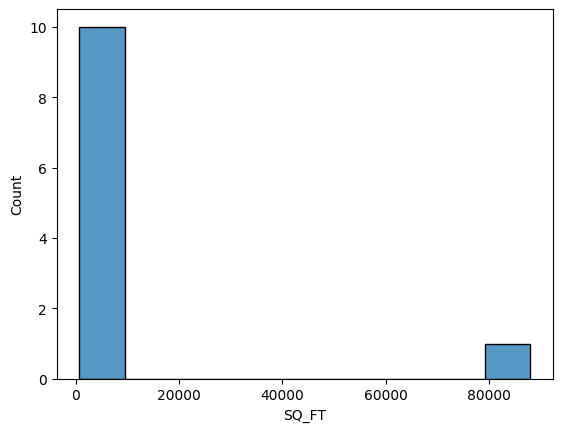

In [7]:
# Membuat histogram SQ_FT
sns.histplot(data=property_data,x="SQ_FT", bins=10)

Selain histogram, boxplot juga dapat digunakan untuk melihat sebaran data.

<Axes: xlabel='SQ_FT'>

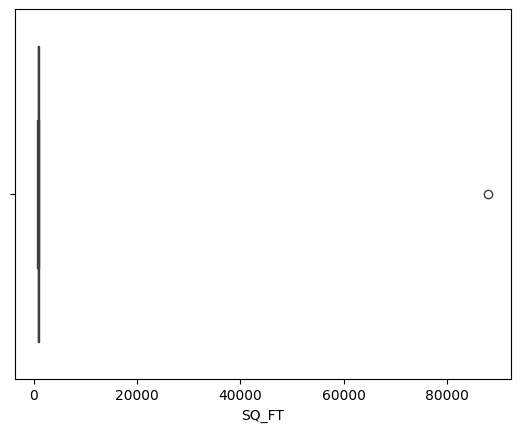

In [12]:
# Membuat boxplot SQ_FT
sns.boxplot(data=property_data,x="SQ_FT")

Dari hasil visualisasi di atas, dapat dilihat terdapat outlier pada kolom SQ_FT.

### Handling Outlier

Dari hasil identifikasi sebelumnya, diketahui terdapat outlier pada kolom SQ_FT. Outlier dapat ditangani dengan cara:
1. Mengahapus data yang mengandung outlier, atau
2. Menganti nilai outlier dengan nilai statistik yang lebih representatif.  [(Aguinas et al., 2013)](http://www.hermanaguinis.com/ORMoutliers.pdf)



Dalam pembelajaran ini, akan digunakan cara yang kedua

Untuk mengganti nilai outlier, terlebih dahulu kita cari data yang lebih kecil dari **1.5*Q3** ([Batas atas nilai untuk mendeteksi outlier](https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097)).

In [13]:
# batas atas data
batas_atas = property_data["SQ_FT"].quantile(q=0.75) * 1.5
batas_atas

1425.0

In [16]:
property_data.shape

(11, 7)

In [17]:
# plot tanpa outlier
property_without_outlier = property_data[property_data['SQ_FT'] < batas_atas]
property_without_outlier

,lai,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104,PUTNAM,Y,3.0,1.0,900.0
1,100002000,197,LXT,N,1.0,1.0,900.0
2,100003000,199,LEXINGTON,N,1.0,1.0,850.0
3,100004000,201,berkeley,Y,1.0,1.0,700.0
4,100004000,201,berkeley,Y,1.0,1.0,700.0
5,100005000,203,BERKELEY,Y,3.0,2.0,975.0
6,100006000,207,Berkeley,Y,1.0,1.0,800.0
7,100007000,209,WASHINGTON,Y,2.0,1.0,950.0
8,100008000,213,TREMONT,Y,1.0,1.0,900.0
10,100007000,209,WASHINGTON,Y,2.0,1.0,950.0


In [18]:
property_without_outlier.shape

(10, 7)

<Axes: xlabel='SQ_FT', ylabel='Count'>

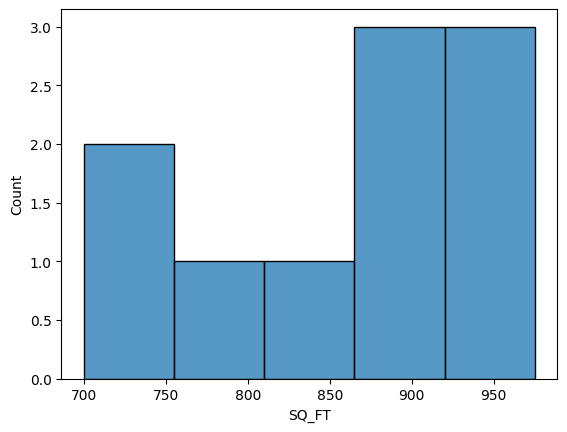

In [21]:
sns.histplot(data=property_without_outlier['SQ_FT'])

Selanjutnya untuk mendapatkan hasil diatas, kita akan mengganti nilai outlier dengan nilai mediannya.

In [27]:
median_SQ_FT = property_data['SQ_FT'].median()
median_SQ_FT

900.0

In [33]:
property_data.loc[property_data['SQ_FT'] > batas_atas,'SQ_FT'] = median_SQ_FT
property_data

,lai,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104,PUTNAM,Y,3.0,1.0,900.0
1,100002000,197,LXT,N,1.0,1.0,900.0
2,100003000,199,LEXINGTON,N,1.0,1.0,850.0
3,100004000,201,berkeley,Y,1.0,1.0,700.0
4,100004000,201,berkeley,Y,1.0,1.0,700.0
5,100005000,203,BERKELEY,Y,3.0,2.0,975.0
6,100006000,207,Berkeley,Y,1.0,1.0,800.0
7,100007000,209,WASHINGTON,Y,2.0,1.0,950.0
8,100008000,213,TREMONT,Y,1.0,1.0,900.0
9,100009000,215,TREMONT,Y,1.0,2.0,900.0


<Axes: xlabel='SQ_FT', ylabel='Count'>

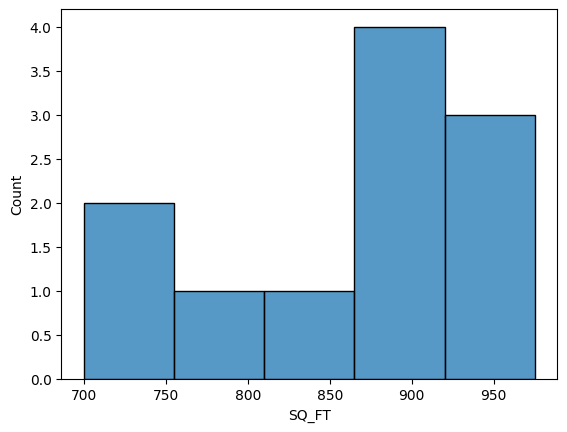

In [34]:
sns.histplot(data=property_data['SQ_FT'])

### **Subtopik 3 : Handling duplicated**

Setelah menangani data outlier, Rudi diminta untuk mengecek apakah terdapat data duplikat pada dataset yang dimiliki.

Data duplikat dikategorikan sebagai record data yang memiliki nilai yang sama dengan record lainnya.

### Identifikasi Duplikat

Untuk mengidentifikasi duplikat, dapat digunakan method `duplicated()` dari object dataframe. Jika data tersebut memiliki nilai yang sama dengan record data sebelumnya, maka hasil pengecekannya bernilai `True`

In [38]:
# read data property
property_data = pd.read_csv('property_without_outlier.csv')

# menampilkan semua data property
property_data

,lai,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104,PUTNAM,Y,3.0,1.0,900.0
1,100002000,197,LXT,N,1.0,1.0,900.0
2,100003000,199,LEXINGTON,N,1.0,1.0,850.0
3,100004000,201,berkeley,Y,1.0,1.0,700.0
4,100004000,201,berkeley,Y,1.0,1.0,700.0
5,100005000,203,BERKELEY,Y,3.0,2.0,975.0
6,100006000,207,Berkeley,Y,1.0,1.0,800.0
7,100007000,209,WASHINGTON,Y,2.0,1.0,950.0
8,100008000,213,TREMONT,Y,1.0,1.0,900.0
9,100009000,215,TREMONT,Y,1.0,2.0,900.0


In [40]:
property_data.duplicated(keep=False)

,0
0,False
1,False
2,False
3,True
4,True
5,False
6,False
7,True
8,False
9,False


In [41]:
# Menyeleksi data yang dikategorikan sebagai data duplikat
property_data[property_data.duplicated(keep=False)]

,lai,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
3,100004000,201,berkeley,Y,1.0,1.0,700.0
4,100004000,201,berkeley,Y,1.0,1.0,700.0
7,100007000,209,WASHINGTON,Y,2.0,1.0,950.0
10,100007000,209,WASHINGTON,Y,2.0,1.0,950.0


### Handling Duplikat

Menghilangkan record data yang duplikat dapat dilakukan dengan method `drop_duplicates()`. Pada method ini kita punya pilihan untuk:
  - Mempertahankan record yang pertama, `keep='first'`
  - Mempertahankan record yang terakhir, `keep='last'`
  - Drop kedua data yang duplikat, `keep=False`


  pada kasus ini kita akan mempertahankan record yang pertama

In [43]:
# Menghilangkan data duplikat
property_data.drop_duplicates(keep='first',inplace=True)
property_data

,lai,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104,PUTNAM,Y,3.0,1.0,900.0
1,100002000,197,LXT,N,1.0,1.0,900.0
2,100003000,199,LEXINGTON,N,1.0,1.0,850.0
3,100004000,201,berkeley,Y,1.0,1.0,700.0
5,100005000,203,BERKELEY,Y,3.0,2.0,975.0
6,100006000,207,Berkeley,Y,1.0,1.0,800.0
7,100007000,209,WASHINGTON,Y,2.0,1.0,950.0
8,100008000,213,TREMONT,Y,1.0,1.0,900.0
9,100009000,215,TREMONT,Y,1.0,2.0,900.0


In [44]:
property_data[property_data.duplicated(keep=False)]

,lai,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT


### **Subtopik 4 : Handling Inconsistent**

Untuk memastikan kualitas data saat dianalisis, pada tahapan terakhir Rudi diminta untuk memastikan tidak ada nilai yang inskonsisten didalam kolom.

Pengertian inskonsisten format yang dimaksud adalah data yang memiliki meaning yang sama namum penulisannya berbeda.

Contoh pada kolom `ST_NAME`  nilai `berkeley`, `Berkeley` dan `BERKELEY` merujuk ke hal yang sama.

Untuk memudahkan analisa, penulisan tersebut akan diseragamkan. Misal membuat semua nilai `berkeley`, `Berkeley` menjadi `BERKELEY`.

In [45]:
property_data

,lai,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104,PUTNAM,Y,3.0,1.0,900.0
1,100002000,197,LXT,N,1.0,1.0,900.0
2,100003000,199,LEXINGTON,N,1.0,1.0,850.0
3,100004000,201,berkeley,Y,1.0,1.0,700.0
5,100005000,203,BERKELEY,Y,3.0,2.0,975.0
6,100006000,207,Berkeley,Y,1.0,1.0,800.0
7,100007000,209,WASHINGTON,Y,2.0,1.0,950.0
8,100008000,213,TREMONT,Y,1.0,1.0,900.0
9,100009000,215,TREMONT,Y,1.0,2.0,900.0


In [46]:
# read data property
property_data = pd.read_csv('property_without_duplicates.csv')

# menampilkan semua data property
property_data

,lai,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104,PUTNAM,Y,3.0,1.0,900.0
1,100002000,197,LXT,N,1.0,1.0,900.0
2,100003000,199,LEXINGTON,N,1.0,1.0,850.0
3,100004000,201,berkeley,Y,1.0,1.0,700.0
4,100005000,203,BERKELEY,Y,3.0,2.0,975.0
5,100006000,207,Berkeley,Y,1.0,1.0,800.0
6,100007000,209,WASHINGTON,Y,2.0,1.0,950.0
7,100008000,213,TREMONT,Y,1.0,1.0,900.0
8,100009000,215,TREMONT,Y,1.0,2.0,900.0


Pada data diatas dapat diidentifikasi terdapat format yang inkonsisten pada kolom ST_NAME. Kita akan identifikasi lebih lanjut dengan menggunakan beberapa cara.

### Identifikasi inkonsistensi

Mengecek inkonsistensi dapat dilakukan dengan mengecek nilai unik pada kolom tersebut. Untuk mengecek nilai unik dapat digunakan method `unique()` pada kolom yang ingin dicek.

In [48]:
property_data['ST_NAME'].unique()

array(['PUTNAM', 'LXT', 'LEXINGTON', 'berkeley', 'BERKELEY', 'Berkeley',
       'WASHINGTON', 'TREMONT'], dtype=object)

Alternatif lain dapat digunakan method `value_counts()`. Namun pada value counts selain menampilkan data unik, juga akan ditampilkan frekuensi kemunculan dari tiap data unik didalam kolom tersebut.

In [50]:
property_data['ST_NAME'].value_counts()

,count
ST_NAME,
TREMONT,2
PUTNAM,1
LXT,1
LEXINGTON,1
berkeley,1
BERKELEY,1
Berkeley,1
WASHINGTON,1


### Handling inkonsistensi

Menangani data inkonsisten dapat dilakukan dengan penyeragaman. Sehingga perlu mengubah nilai yang memiliki meaning yang sama kedalam satu format.

Hal ini dapat dilakukan dengan cara:
1. Melakukan mapping inkonsiten format ke bentuk yang diinginkan
2. Menggunakan hasil mapping untuk mengganti nilai yang inkonsisten

In [55]:
# mapping inkonsisten ke format yang benar
map_inkonsistent = {
    "LXT" : "LEXINGTON",
    "berkeley" : "BERKELEY",
    "Berkeley" : "BERKELEY",
}

Untuk mengganti nilai inkonsisten ke nilai yang benar, akan digunakan method `replace()`.

Note: method replace digunakan karena data pada kolom ST_NAME bertipe string

In [57]:
# mengubah hasil mapping sehingga nilai menjadi seragam
property_data["ST_NAME"].replace(map_inkonsistent)

,ST_NAME
0,PUTNAM
1,LEXINGTON
2,LEXINGTON
3,BERKELEY
4,BERKELEY
5,BERKELEY
6,WASHINGTON
7,TREMONT
8,TREMONT


In [59]:
property_data

,lai,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104,PUTNAM,Y,3.0,1.0,900.0
1,100002000,197,LXT,N,1.0,1.0,900.0
2,100003000,199,LEXINGTON,N,1.0,1.0,850.0
3,100004000,201,berkeley,Y,1.0,1.0,700.0
4,100005000,203,BERKELEY,Y,3.0,2.0,975.0
5,100006000,207,Berkeley,Y,1.0,1.0,800.0
6,100007000,209,WASHINGTON,Y,2.0,1.0,950.0
7,100008000,213,TREMONT,Y,1.0,1.0,900.0
8,100009000,215,TREMONT,Y,1.0,2.0,900.0


In [60]:
property_data['ST_NAME'] = property_data["ST_NAME"].replace(map_inkonsistent)
property_data

,lai,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104,PUTNAM,Y,3.0,1.0,900.0
1,100002000,197,LEXINGTON,N,1.0,1.0,900.0
2,100003000,199,LEXINGTON,N,1.0,1.0,850.0
3,100004000,201,BERKELEY,Y,1.0,1.0,700.0
4,100005000,203,BERKELEY,Y,3.0,2.0,975.0
5,100006000,207,BERKELEY,Y,1.0,1.0,800.0
6,100007000,209,WASHINGTON,Y,2.0,1.0,950.0
7,100008000,213,TREMONT,Y,1.0,1.0,900.0
8,100009000,215,TREMONT,Y,1.0,2.0,900.0
